## Getting set up

In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [258]:
df1 = pd.read_csv('Movie data up to row 1000.csv')
df2 = pd.read_csv('Movie data up to row 2000.csv')
df3 = pd.read_csv('Movie data up to row 3000.csv')

#1. combine the dataframes from the data gathering workbook

df = pd.concat([df1, df2, df3])

In [259]:
#2. clean the dataframes

#remove rows without gender
df = df[~df['Gender'].isnull()]

#remove rows without revenue
df = df[df['Revenue'] != 0]

#remove rows without budget
df = df[df['Budget'] != 0]

#remove NaN release years
df = df[~df['release_year'].isna()]

#make years int instead of float
df['release_year'] = df['release_year'].apply(lambda year: int(year))

In [260]:
num_movies = len(df)
print("There are {} movies in the dataset.".format(num_movies))

There are 2004 movies in the dataset.


## Basic stats about the movies

In [323]:
#saves a lot of repetition in the descriptive statistics
women = df.loc[df['Gender'] == 'female']
men = df.loc[df['Gender'] == 'male']

In [429]:
num_women = women['Gender'].count()
num_men = men['Gender'].count()
num_total = df['Gender'].count()

print("Out of the most popular {} movies on TMDb, {}% ({}) are by women directors."
      .format(num_movies, round(num_women/num_total*100, 2), num_women))

Out of the most popular 2004 movies on TMDb, 4.94% (99) are by women directors.


In [711]:
women_budget = df[df['Gender'] == 'female']['Budget'].mean()
men_budget = df[df['Gender'] == 'male']['Budget'].mean()

print("Average budget for movies with women directors is ${} million - vs ${} million for men.\nThat's ${} million less than men."
      .format(round(women_budget/10**6, 2),
              round(men_budget/10**6, 2),
              round((men_budget-women_budget)/10**6, 2)
             )
     )

Average budget for movies with women directors is $39.37 million - vs $54.1 million for men.
That's $14.73 million less than men.


In [431]:
women_budget_top_quartile = women['Budget'].quantile(0.75)
men_budget_top_quartile = men['Budget'].quantile(0.75)

print("The top quartile of women directors have a budget of ${} million less than the men in the same quartile."
      .format((men_budget_top_quartile - women_budget_top_quartile)/10**6))

The top quartile of women directors have a budget of $28.5 million less than the men in the same quartile.


In [710]:
women_revenue = women['Revenue'].mean()
men_revenue = men['Revenue'].mean()

print("Average revenue for movies with women directors is ${} million - vs ${} for men.\nThat's ${} million less than men."
      .format(round(women_revenue/10**6, 2),
              round(men_revenue/10**6, 2),
              round((men_revenue-women_revenue)/10**6, 2)
             )
     )

Average revenue for movies with women directors is $131.07 million - vs $191.79 for men.
That's $60.73 million less than men.


In [433]:
women_ROI = women['Revenue'].sum()/women['Budget'].sum()
men_ROI = men['Revenue'].sum()/men['Budget'].sum()

print("The average movie by a woman director makes ${} for every $1 of budget, vs ${} for a man."
      .format(round(women_ROI, 2), round(men_ROI, 2)))

The average movie by a woman director makes $3.33 for every $1 of budget, vs $3.55 for a man.


In [708]:
women_vote = women['Vote_Avg'].mean()
men_vote = men['Vote_Avg'].mean()

print("The average community rating for a woman director is {}, vs {} for a man."
      .format(round(women_vote, 2), round(men_vote, 2)))

The average community rating for a woman director is 6.62, vs 6.65 for a man.


## How many movies were made by women vs. men in each year?

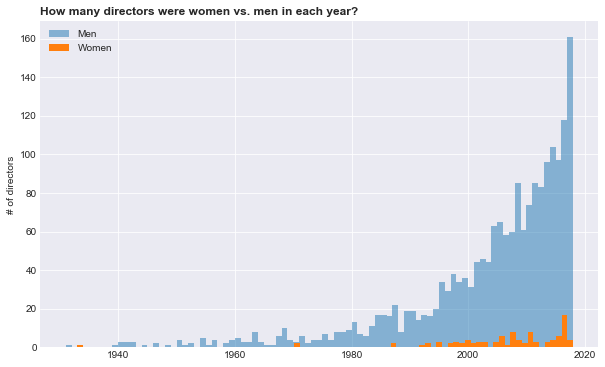

In [651]:
plt.figure(figsize=(10,6))

plt.title('How many directors were women vs. men in each year?', loc='left', fontweight='bold')
plt.ylabel('# of directors')


plt.hist(men['release_year'], alpha=.5, bins = 87, label='Men')
plt.hist(women['release_year'], bins = 87, label='Women');

plt.legend();

In [627]:
#get time series of percentage of directors in each year who are women
#iterates through two dictionaries with {year: count of movies} as k:v pairs
#returns a single dictionary with the percentage of movies by the numerator's gender for each year
def gender_percent_in_year(numerator, denominator):
    res = denominator
    
    for year in res:
        if year not in numerator:
            res[year] = 0
    
    for year, count in numerator.items():
        if year in res:
            res[year] = count/res[year] *100

    return res

In [628]:
percent_women_directors_each_year = gender_percent_in_year(count_women_by_year, count_men_by_year)

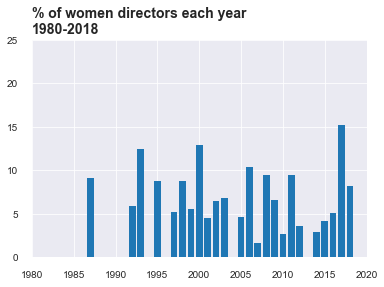

In [690]:
plt.title('% of women directors each year\n1980-2018', loc='left', fontsize=14, fontweight='bold')
plt.bar(percent_women_directors_each_year.keys(),percent_women_directors_each_year.values())
plt.xlim([1980,2020])
plt.ylim([0,25])

sns.despine(offset=10, trim=True); #prettify the axes

___

## What's ROI for films by women vs. men?

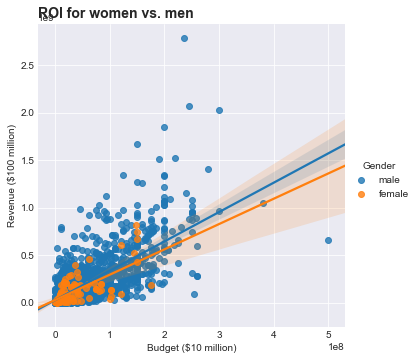

In [668]:
ax = sns.lmplot(x = 'Budget', y = 'Revenue', data=df, hue = 'Gender')
ax.set(xlabel='Budget ($10 million)')
ax.set(ylabel='Revenue ($100 million)')
plt.title('ROI for women vs. men', loc='left', fontsize=14, fontweight='bold')
plt.show()

## Does spending more on a movie make it more popular?

Text(0,1,'Relationship between budget and popularity')

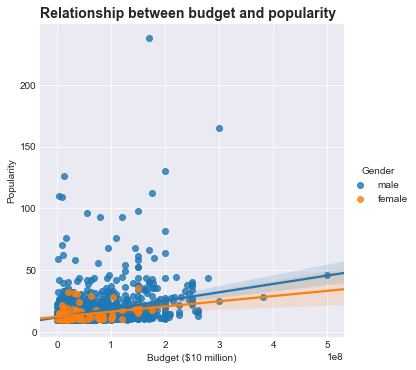

In [672]:
ax = sns.lmplot(x = 'Budget', y = 'Popularity', data = df, hue = 'Gender')
ax.set(xlabel='Budget ($10 million)')
plt.title('Relationship between budget and popularity', loc='left', fontsize=14, fontweight='bold')

The answer: sort of. Movies by women directors are slightly less popular, even at higher budgets.

## What are the distributions of crowd ratings for movies by women vs. men?

/Users/Ben/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

/Users/Ben/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



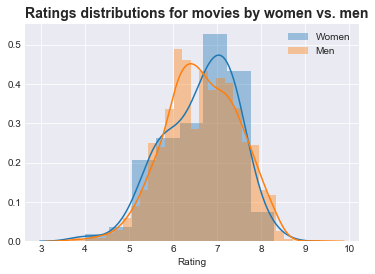

In [719]:
fig, ax = plt.subplots()
sns.distplot(women['Vote_Avg'], ax=ax, label='Women')
sns.distplot(men['Vote_Avg'], ax=ax, label='Men')

plt.title('Ratings distributions for movies by women vs. men', loc='left', fontsize=14, fontweight='bold')
ax.set(xlabel='Rating')
ax.legend()

## Directions for further research

- **Investigate why movies by women directors have lower ROI than for men.** Is there data available on movies' advertising budgets, social media conversation, media coverage, etc? (causal hypothesis: that women directors get less support and less serious coverage, and so make less money per dollar of filmmaking budget).
- **Scrape Metacritic or Rotten Tomatoes rating data.** How does it correlate with TMDb ratings? Is there a gender disparity? Is the distribution skewed similarly to the TMDb ratings distribution?